<a href="https://colab.research.google.com/github/qkrgkstjr/2020_cphys2/blob/master/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wine clustering
- 아래 와인 데이터를 이용하여 와인을 클러스터링하고 보고서를 작성하세요.
- 코드, 클러스터링 결과, 보고서를 종합적으로 평가합니다.
- 다음 사이트의 다양한 클러스터링 기법을 참조하세요.
- https://scikit-learn.org/stable/modules/clustering.html

In [34]:
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
import numpy as np
from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

np.random.seed(0)

wine = load_wine()
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [35]:
X=wine['data']
y=wine['target']

In [36]:
X.shape, y.shape

((178, 13), (178,))

In [37]:
# 그래프 만들기 위한 이름 array 만들어서 list로 바꾸기
wine_names=[]
k=0
for k in range(len(wine.feature_names)):
  for i in range(len(wine.feature_names)):
    wine_names.append(wine.feature_names[k][:4]+'-'+wine.feature_names[i][:4])

for i in range(len(wine.feature_names)):
  del wine_names[13*i]

wine_names=np.reshape(wine_names,(13,12))
wine_names=wine_names.tolist()

In [38]:
# 중복되는 이름 지우기
for i in range(len(wine_names)):
  del wine_names[i][:i]

In [39]:
# 리스트 하나로 합치기
for i in range(len(wine_names)-1):
  wine_names[0].extend(wine_names[1])
  del wine_names[1]

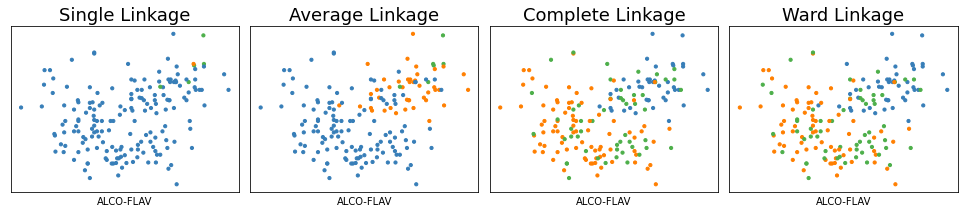

In [40]:
plt.figure(figsize=(9 * 1.3 + 2, 14.5))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05, hspace=.01)

plot_num = 1

n_clusters = 3

# X축
i=0
# Y축
j=5

single = cluster.AgglomerativeClustering(n_clusters, linkage='single')
average = cluster.AgglomerativeClustering(n_clusters, linkage='average')
complete = cluster.AgglomerativeClustering(n_clusters, linkage='complete')
ward = cluster.AgglomerativeClustering(n_clusters, linkage='ward')

clustering_algorithms = (('Single Linkage', single),
    ('Average Linkage', average),
    ('Complete Linkage', complete),
    ('Ward Linkage', ward),)

for name, algorithm in clustering_algorithms:
        
    algorithm.fit(X)

    if hasattr(algorithm, 'labels_'):
        y_pred = algorithm.labels_.astype(np.int)
    else:
        y_pred = algorithm.predict(X)

    plt.subplot(6, 4, plot_num) 
    plt.title(name, size=18)

    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a']),
                                  int(max(y_pred) + 1))))
    plt.scatter(X[:, i], X[:, j], s=10, color=colors[y_pred])
    plt.xlabel(wine_names[0][5].upper())
    plt.xticks(())
    plt.yticks(())

    plot_num += 1    


### Single
##### Single linkage method는 그래프 기반의 연결법으로 각 데이터를 Node로 하고, Nodes 간 연결한 선을 Link or Arc로 하며, 이들 Link or Arc 의 길이를 가지고 거리를 측정한다. 최단연결법 이라고도 하며, 다른 군집에 속한 가장 가까운 두 점 사이의 거리를 군집 간의 거리로 측정하는 방법이다. 

##### Single 그래프를 보면 알 수 있듯 군집 3개로 분류했을 때 충분히 분류되지 않았고 초록색 주황색 점이 아주 적게 분류되었음을 알 수 있다.
--------------------------------------------------------------------------------

### Average
#####Average linkage method은 서로 다른 군집 간의 모든 짝을이룬 점들의 평균 거리로 유사성을 측정한다.
##### Single과는 달리 비교적 많이 분류되었지만 어떤 군집으로 분류되었는지 경향성을 띄는지 까진 확인하기가 어려웠다

--------------------------------------------------------------------------------

### Complete
#####Singlelinkage method이 군집 간 거리를 잴 때 다른 군집의 점들 중에서 가장 가까운 두 점 간의 거리를 사용하였다면, Complete linkage method은 반대로 다른 군집의 점들 중에서 가장 멀리 떨어진 두 점 간의 거리를 가지고 군집 간 거리를 잰다. 

-------------------------------------------------------------------------------

### Ward
#####Ward linkage method은 두 군집 간의 유사성을 두 군집이 합쳐졌을 때의 오차 제곱합의 증가분에 기반해서 측정합니다. 즉, 거리 행렬를 구할 때 오차제곱합의 증분을 두 군집 사이의 거리로 측정하게 된다. 단일 연결법이 노이즈나 이상치에 민감한 반면에, Ward 연결법은 노이즈나 이상치에 덜 민감한 장점이 있습니다. 그리고 Ward 연결법은 비슷한 크기의 군집끼리 묶어주는 경향이 있습니다.